# SAMPLING

## Population and Sample:
They depends on the question made. Population is the set of ALL individuals relevant to the question. The Sample *individuals, units, events, observations* mean the same thing.

### The *Parameter* is the metric of Population, The * Statistic* is the metric of the sample

    * Parameter - Statistic = Sampling error *
    
In statistical terms, we want our samples to be **representative** of their corresponding populations
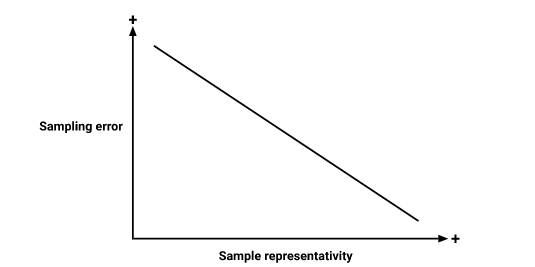

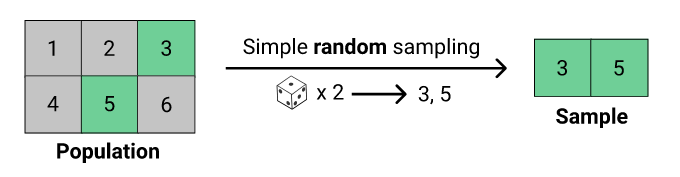
Simple random sampling **SRS** is to give an equal chance to be selected ramdomly.

***Series.sample(n, random_state)***  or **df.sample()** are used as random gen. random_state is the initial value of random so it is pseudo random generation that will produce the same random numbers each time it runs, it is used for scientific research to reproduce the values exaclty the same.

## Stratified Sampling.
To give each class or strata of the population a fair chance to be sampled. Each strata or clasification on the population is called **stratum**
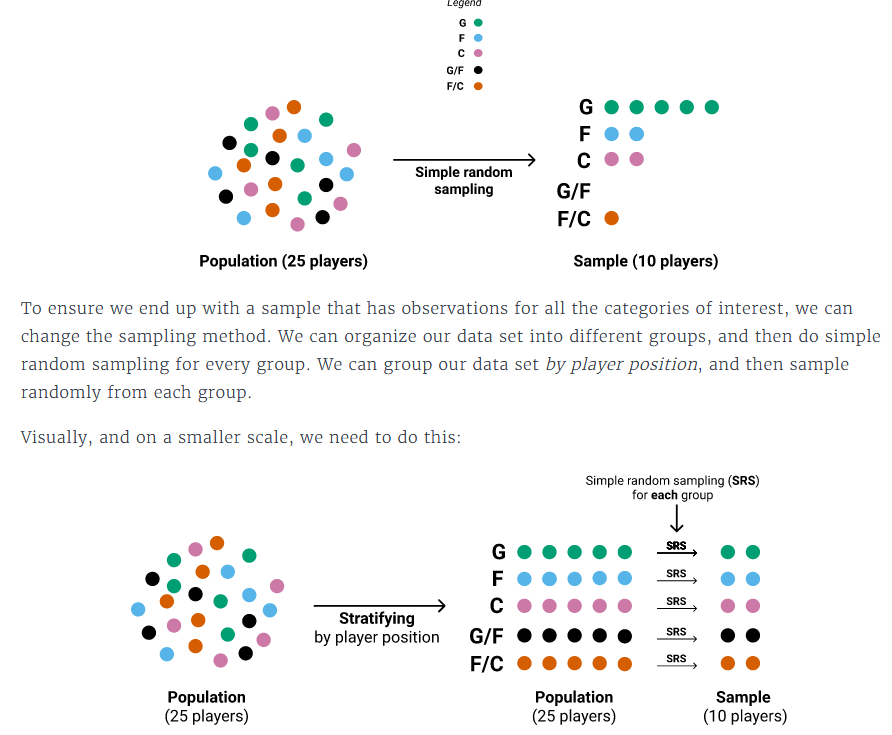


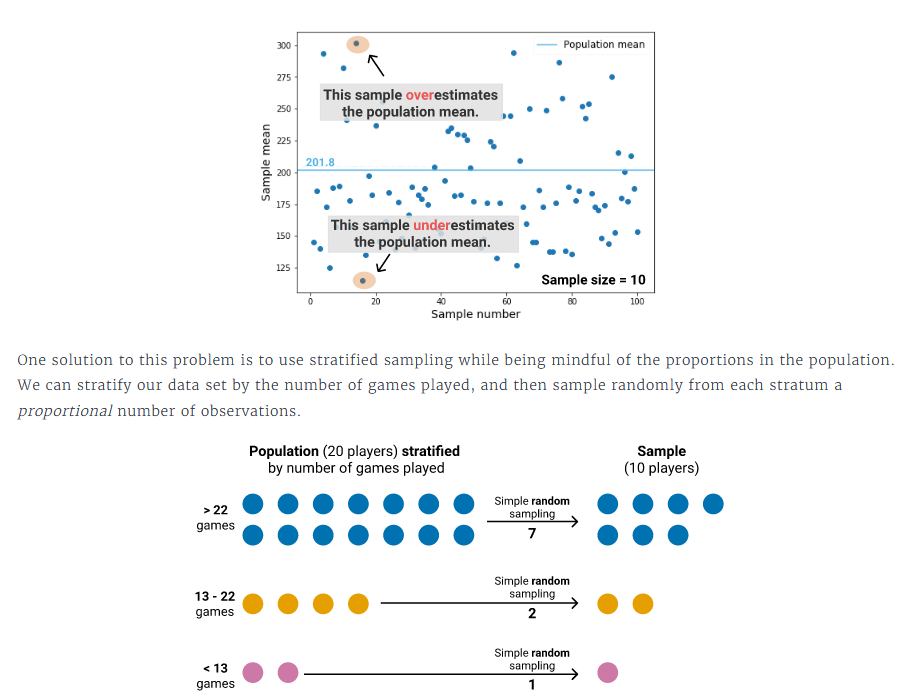

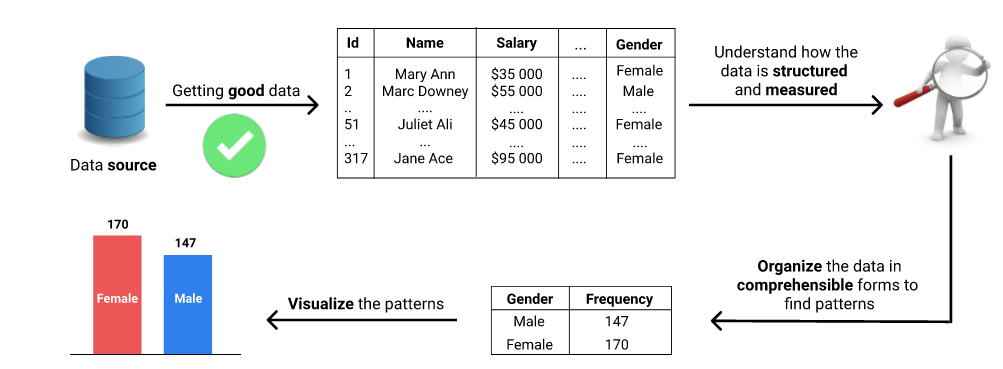

### Stratum points to consider:

1. Minimize the variability within each stratum.

If the variability is high, it might be a sign that you either need a more granular stratification (need more strata).

2. Maximize the variability between strata.

Good strata are different from one another. If you have strata that are similar to one another with respect to what you want to measure, you might need a more granular stratification, or to change the stratification criterion. 

3. The stratification criterion should be strongly correlated with the property you're trying to measure.

For instance, the column describing minutes played (the criterion) should be strongly correlated with the number of total points (property we want to measure).

The data set is about basketball players in WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017. The data set was put together by Thomas De Jonghe, and can be downloaded from Kaggle, where you can also find useful documentation for the data set.

Stats from all games of season [2016-2017](https://www.kaggle.com/jinxbe/wnba-player-stats-2017)

    G = Games Played
    MIN = Minutes Played
    FGM = Field Goals Made
    FGA = Field Goals Attempts
    FG% = Field Goals %
    3PM = 3Points Made
    3PA = 3Points Attempts
    3P% = 3Points %
    FTM = Free Throws made
    FTA = Free Throws Attempts
    FT% = Free Throws %
    OREB = Offensive Rebounds
    DREB = Defensive Rebounds
    REB = Total Rebounds
    AST = Assists
    STL = Steals
    BLK = Blocks
    TO = Turnovers
    PTS = Total points
    DD2 = Double doubles
    TD3 = Triple doubles


## Data exploration

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
wnba = pd.read_csv('wnba.csv')
print(wnba.head(5))
print(wnba.shape)

              Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College ...  OREB  DREB  REB  AST  STL  BLK  \
0   January 17, 1994   23  Michigan State ...     6    22   28   12    3    6   
1       May 14, 1982   35            Duke ...    19    82  101   72   63   13   
2   October 27, 1990   26      Penn State ...     4    36   40   78   22    3   
3  December 11, 1988   28    Georgia Tech ...    35   134  169   65   20   10   
4     August 5, 1994   23          Baylor ...     3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  218    0  

# Sampling Error

### Sampling error using one sample of size n = 30

In [43]:
#Sampling Games Played
parameter = wnba['Games Played'].max()
sample = wnba['Games Played'].sample(n = 30, random_state =1)
statistic = sample.max()
sampling_error = parameter - statistic
sampling_error

2

## Sampling error vs number of samples

### Taking 100 samples of size 10

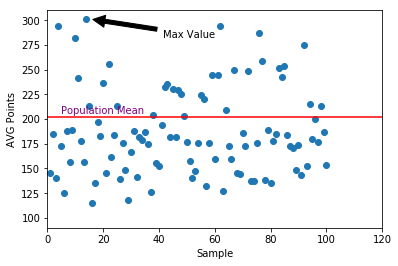

In [44]:
slist = []
for each in range(100):
    sample = wnba.PTS.sample(n=10,random_state =each)
    slist.append(sample.mean())
plt.scatter(range(1,101),slist)
plt.ylabel("AVG Points")
plt.xlabel("Sample")
plt.axis([0,120,90,310])
plt.text(5,205,r'Population Mean', color ="purple")
plt.annotate('Max Value', xy=(15,max(slist)),xytext=(60,290),
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.axhline(wnba.PTS.mean(), c = "red", )
plt.show()

### Varing the number of sample size from n = 10 to n = 100

In [45]:
tlist = [] # contains the slist with various sample sizes
nlist = [10,40,80,110] # sample sizes
for e in range(4):
    slist = []
    for each in range(100):
        sample = wnba.PTS.sample(n=nlist[e], random_state =each)
        slist.append(sample.mean())
    tlist.append(slist)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


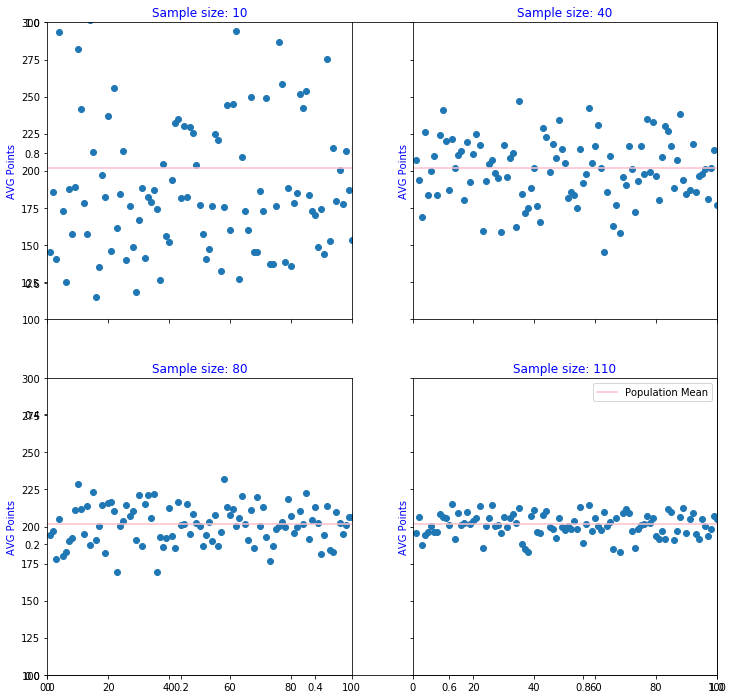

In [144]:
fig, ax = plt.subplots(figsize = (12,12))
for e in range(4):
    ax = fig.add_subplot(2,2,e+1)
    ax.scatter(range(1,101),tlist[e])
    ax.axhline(wnba.PTS.mean(), label = "Population Mean", c ="pink")
    ax.axis([0,100,100,300])
    ax.set_title("Sample size: {}".format(nlist[e]), color = "blue")
    ax.set_ylabel("AVG Points", color = "blue")
    ax.tick_params(labelbottom = 'False', labelleft = 'False')
    if e in [2,3]:
        ax.tick_params(labelbottom = 'True')
    if e in [0,2]:
        ax.tick_params(labelleft = 'True')
ax.legend(loc = "upper right")
plt.show()

## Stratified Sampling
### Sampling equaly on each stratum

In [54]:
# Stratum on the population
wnba.Pos.value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

In [77]:
# Sampling by stratum player position "Pos", the stats are based on PTS/Games Played
pos = wnba.Pos.unique()
wnba["pts_game"] = wnba.PTS / wnba["Games Played"]
dic = {}
for e in pos:
    dic[e] = wnba[wnba.Pos == e].pts_game.sample(n= 10, random_state = 1).mean()
import operator
max(dic.items(), key=operator.itemgetter(1))[0]

'F/C'

### Sampling size based on stratum percentage

In [89]:
#Stratum based on Games Played
s1 = wnba[wnba["Games Played"] <= 12]
s2 = wnba[(wnba["Games Played"] > 12) & (wnba["Games Played"] <= 22) ]
s3 = wnba[wnba["Games Played"] > 22]
lis = []
for e in range(100):
    one =s1.sample(n=1, random_state = e)
    two =s2.sample(n=2, random_state = e)
    three =s3.sample(n=7, random_state = e)
    totdf =pd.concat([one,two,three])
    lis.append(totdf.PTS.mean())

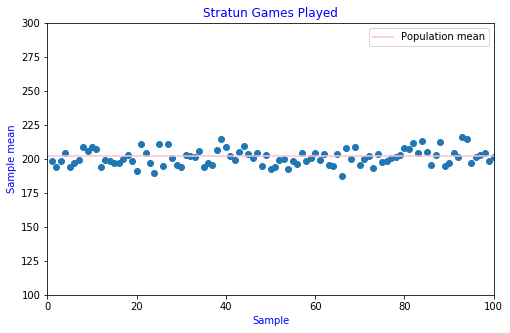

In [150]:
fig1, ax1 = plt.subplots(figsize = (8,5))
ax1.scatter(range(1,101),lis)
ax1.axhline(wnba.PTS.mean(), color = "pink", label = "Population mean")
ax1.legend(loc = "upper right")
ax1.set_xlabel("Sample", color = "Blue")
ax1.set_ylabel("Sample mean", color = "Blue")
ax1.set_title("Stratun Games Played",color = "Blue")
ax1.axis([0,100,100,300])
plt.show()

In [117]:
# Using different stratum criteria (minutes played)
wnba.MIN.describe()

count     143.000000
mean      496.972028
std       290.777320
min        12.000000
25%       240.000000
50%       504.000000
75%       750.000000
max      1018.000000
Name: MIN, dtype: float64

In [120]:
# Stratum based on minutes
s1 =wnba[wnba.MIN <= 240]
s2 = wnba[(wnba.MIN > 240) & (wnba.MIN <=500)]
s3 = wnba[(wnba.MIN >500) & (wnba.MIN <=750)]
s4 = wnba[wnba.MIN > 750]

In [128]:
#Sampling strata
lis = []
for e in range(100):
    m1 = s1.PTS.sample(n=20, random_state = e)
    m2 = s2.PTS.sample(n=20, random_state = e)    
    m3 = s3.PTS.sample(n=20, random_state = e)    
    m4 = s4.PTS.sample(n=20, random_state = e)
    mean = pd.concat([m1,m2,m3,m4]).mean()
    lis.append(mean)

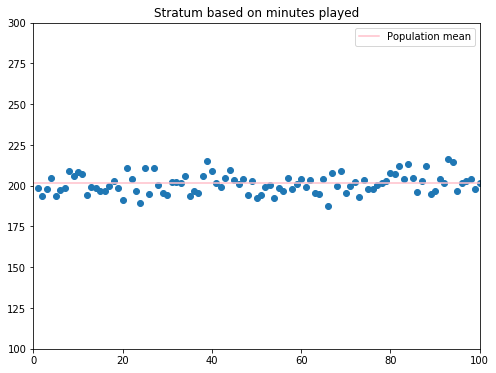

In [185]:
# Graphs
fig2, ax2 = plt.subplots(figsize = (8,6))
ax2.scatter(range(1,101),lis)
ax2.set_title("Stratum based on minutes played")
ax2.axhline(wnba.PTS.mean(), label = "Population mean", color = "pink")
ax2.legend(loc = "upper right")
ax2.axis([0,100,100,300])
plt.show()